

# Question 2: What strains and subtypes were most common in the US in 2017-18?

Answering questions 2 and 3 will require retrieving records from sequence databases.

#### Data source

The datasets in this project are from the [Influenza Research Database](https://www.fludb.org/brc/home.spg?decorator=influenza), a viral data repository that pulls from [NCBI GenBank](https://www.ncbi.nlm.nih.gov/genbank/) and [NCBI RefSeq](https://www.ncbi.nlm.nih.gov/refseq/).

I'm going to pull records according to strain, for both flus A and B, and for flu season 17-18.

** Note: This analysis is performed only on data from the Influenza Research Database and is not a complete analysis of the 2017-18 flu season as not all US flu cases may have been reported, sequenced and deposited in this database. 


---
# Preparing the Data: Moving flu raw data into DataFrames

In [4]:
# Import data analysis libraries 
import numpy as np
import pandas as pd

# Import visualization libraries
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('paper', font_scale=1.)
import matplotlib.pyplot as plt
%matplotlib inline 

In [5]:
# Load the flu datasets and look at the available column names

df_fluA = pd.read_csv('fluA_strains.tsv', sep='\t')
df_fluB = pd.read_csv('fluB_strains.tsv', sep='\t')

df_fluA.columns

Index(['Strain Name', 'Complete Genome', 'Subtype', 'Collection Date', 'Host',
       'Country', 'State/Province', 'Geographic Grouping', 'Flu Season',
       'Submission Date', 'Passage History', 'Specimen Source Health Status',
       '1 PB2', '2 PB1', '3 PA', '4 HA', '5 NP', '6 NA', '7 MP', '8 NS', 'Age',
       'Gender', 'M2 31N', 'M2 26F', 'M2 27A', 'M2 30T', 'M2 34E',
       'NA 275Y N1', 'NA 292K N2', 'NA 119V N2', 'NA 294S N2', 'PB1-F2 66S',
       'PB2 E627K', 'PB2 D701N', 'PB2 A199S', 'PB2 A661T', 'PB2 V667I',
       'PB2 K702R', 'PA S409N', 'NP L136M', 'M2 A16G', 'M2 C55F', 'NS1 T92E',
       'RERRRKKR', 'Sensitive Drug', 'Resistant Drug', 'Submission Date.1',
       'NCBI Taxon ID', 'pH1N1-like', 'US Swine H1 Clade',
       'Global Swine H1 Clade test', 'H5 Clade', 'Unnamed: 52'],
      dtype='object')

There are plenty of columns to work with, including subtypes to known mutations or drug resistance. I'm going to keep it simple in the beginning before moving onto sequence data and just explore some demographics such as:
* subtypes; 
* locations; and 
* collection dates. 

In [6]:
# Let's take a look at the first few rows of data for Flu A
df_fluA.head(3)

,Strain Name,Complete Genome,Subtype,Collection Date,Host,Country,State/Province,Geographic Grouping,Flu Season,Submission Date,...,RERRRKKR,Sensitive Drug,Resistant Drug,Submission Date.1,NCBI Taxon ID,pH1N1-like,US Swine H1 Clade,Global Swine H1 Clade test,H5 Clade,Unnamed: 52
0,A/Alabama/01/2018,Yes,H1N1,01/02/2018,Human,USA,Alabama,North America,17-18,2018-03-24,...,No,-N/A-,-N/A-,03/24/2018,11320,Mixed Positive and Negative Segments,npdm,1A.3.3.2,-N/A-,NaN
1,A/Alabama/02/2018,Yes,H1N1,01/03/2018,Human,USA,Alabama,North America,17-18,2018-03-24,...,No,"Oseltamivir,Zanamivir",-N/A-,03/24/2018,11320,Mixed Positive and Negative Segments,npdm,1A.3.3.2,-N/A-,NaN
2,A/Alabama/03/2018,Yes,H3N2,01/03/2018,Human,USA,Alabama,North America,17-18,2018-03-24,...,No,-N/A-,-N/A-,03/24/2018,11320,Negative,-N/A-,-N/A-,-N/A-,NaN


In [7]:
# And here is the first few rows for Flu B
df_fluB.head(3)

,Strain Name,Complete Genome,Subtype,Collection Date,Host,Country,State/Province,Geographic Grouping,Flu Season,Submission Date,...,RERRRKKR,Sensitive Drug,Resistant Drug,Submission Date.1,NCBI Taxon ID,pH1N1-like,US Swine H1 Clade,Global Swine H1 Clade test,H5 Clade,Unnamed: 52
0,B/Alabama/01/2018,No,-N/A-,01/15/2018,Human,USA,Alabama,North America,17-18,2018-04-02,...,-N/A-,-N/A-,-N/A-,04/02/2018,11520,-N/A-,-N/A-,-N/A-,-N/A-,NaN
1,B/Alabama/02/2018,Yes,-N/A-,01/22/2018,Human,USA,Alabama,North America,17-18,2018-04-03,...,-N/A-,-N/A-,-N/A-,04/03/2018,11520,-N/A-,-N/A-,-N/A-,-N/A-,NaN
2,B/Alabama/03/2018,Yes,-N/A-,02/06/2018,Human,USA,Alabama,North America,17-18,2018-04-03,...,-N/A-,-N/A-,-N/A-,04/03/2018,11520,-N/A-,-N/A-,-N/A-,-N/A-,NaN


---

# Extracting Subtype Data by Month 

Now that the DataFrames have been loaded, I can view how many records exist and what information they hold. This will help in determining what tables/figures may be appropriate to neatly summariza the data.

In [8]:
df_fluA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3990 entries, 0 to 3989
Data columns (total 53 columns):
Strain Name                      3990 non-null object
Complete Genome                  3990 non-null object
Subtype                          3990 non-null object
Collection Date                  3990 non-null object
Host                             3990 non-null object
Country                          3990 non-null object
State/Province                   3990 non-null object
Geographic Grouping              3990 non-null object
Flu Season                       3990 non-null object
Submission Date                  3990 non-null object
Passage History                  3990 non-null object
Specimen Source Health Status    3990 non-null object
1 PB2                            3990 non-null object
2 PB1                            3990 non-null object
3 PA                             3990 non-null object
4 HA                             3990 non-null object
5 NP                         

There are about 5k records, and I'd like to limit this investigation to strains collected from Humans. Let's take a look to see if there are any other "Host" animals.

In [9]:
df_fluA['Host'].unique()


array(['Human', 'Mallard', 'Dog', 'Muscovy Duck', 'Crow', 'Mute Swan',
       'Ruddy Turnstone', 'Swine', 'Tufted Duck'], dtype=object)

Plenty of bird hosts along with the unfortunate dog and pig, so let's make a new database for just human hosts named:

df_fluA_Human and df_fluB_Human


In [10]:
df_fluA_Human = df_fluA[df_fluA['Host'] == 'Human']
df_fluB_Human = df_fluB[df_fluB['Host'] == 'Human']
df_fluA_Human.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3239 entries, 0 to 3989
Data columns (total 53 columns):
Strain Name                      3239 non-null object
Complete Genome                  3239 non-null object
Subtype                          3239 non-null object
Collection Date                  3239 non-null object
Host                             3239 non-null object
Country                          3239 non-null object
State/Province                   3239 non-null object
Geographic Grouping              3239 non-null object
Flu Season                       3239 non-null object
Submission Date                  3239 non-null object
Passage History                  3239 non-null object
Specimen Source Health Status    3239 non-null object
1 PB2                            3239 non-null object
2 PB1                            3239 non-null object
3 PA                             3239 non-null object
4 HA                             3239 non-null object
5 NP                         

Now that we have a proper DataFrame containing records from Human infections, let's look at for just Flu A:

##### General Info
* How many records: 'n_records' 
* What were the top 5 states reporting: 'top5_states'
* What states had lowest reporting: 'bottom5_states'

##### Subtype Details
* How many unique subtypes are there: 'n_uni_subtypes'
* What are those subtypes: 'uni_subtypes'


In [11]:
n_records = len(df_fluA_Human)
top5_states = df_fluA_Human['State/Province'].value_counts().head(5)
bottom5_states = df_fluA_Human['State/Province'].value_counts().tail(5)
n_uni_subtypes = df_fluA_Human['Subtype'].nunique()
uni_subtypes = df_fluA_Human['Subtype'].unique()

print("\033[1m" + "General Info" + "\033[0m")
print("Total number of flu A records: {}".format(n_records))
print("Top 5 states reporting Flu A:\n{}\n".format(top5_states))
print("Bottom 5 states reporting Flu A:\n{}\n".format(bottom5_states))
print("\033[1m" + "Subtype Details" + "\033[0m")
print("Number of unique subtypes reported: {}".format(n_uni_subtypes))
print("Those subtypes are: {}".format(uni_subtypes))

General Info
Total number of flu A records: 3239
Top 5 states reporting Flu A:
California    264
-N/A-         254
Florida       153
Texas         129
Maryland      111
Name: State/Province, dtype: int64

Bottom 5 states reporting Flu A:
Vermont           24
Nevada            24
South Carolina    22
Rhode Island       9
Unknown            1
Name: State/Province, dtype: int64

Subtype Details
Number of unique subtypes reported: 4
Those subtypes are: ['H1N1' 'H3N2' 'H3' 'H1']


For Flu A, there are only four reported subtypes, but for simplicity I will count 'H1' with 'H1N1', and 'H3' with 'H3N2'. 

To see the yearly trend of reporting dates, let's plot out when these entries were submitted ('Collection Date) by month.

In [12]:
# Replaces "H1" and "H3" subtypes into full names

df_fluA_Human = df_fluA_Human.replace(to_replace="H1", value="H1N1")
df_fluA_Human = df_fluA_Human.replace(to_replace="H3", value="H3N2")

In [13]:
# Let's check the data type of the 'Collection Date' column

type(df_fluA_Human.loc[:,'Collection Date'].iloc[0])

str

In [14]:
# Since the Collection Date is a str, convert the column to datetime objects for ease in plotting 

df_fluA_Human = df_fluA_Human.copy()  
df_fluA_Human['Collection Date'] = pd.to_datetime(df_fluA_Human['Collection Date'])

# check the conversion
type(df_fluA_Human['Collection Date'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [15]:
# Creates a new column for month of each record. This will be the x-axis of my graph

df_fluA_Human['Month'] = df_fluA_Human['Collection Date'].apply(lambda time: time.month)
df_fluA_Human.columns

Index(['Strain Name', 'Complete Genome', 'Subtype', 'Collection Date', 'Host',
       'Country', 'State/Province', 'Geographic Grouping', 'Flu Season',
       'Submission Date', 'Passage History', 'Specimen Source Health Status',
       '1 PB2', '2 PB1', '3 PA', '4 HA', '5 NP', '6 NA', '7 MP', '8 NS', 'Age',
       'Gender', 'M2 31N', 'M2 26F', 'M2 27A', 'M2 30T', 'M2 34E',
       'NA 275Y N1', 'NA 292K N2', 'NA 119V N2', 'NA 294S N2', 'PB1-F2 66S',
       'PB2 E627K', 'PB2 D701N', 'PB2 A199S', 'PB2 A661T', 'PB2 V667I',
       'PB2 K702R', 'PA S409N', 'NP L136M', 'M2 A16G', 'M2 C55F', 'NS1 T92E',
       'RERRRKKR', 'Sensitive Drug', 'Resistant Drug', 'Submission Date.1',
       'NCBI Taxon ID', 'pH1N1-like', 'US Swine H1 Clade',
       'Global Swine H1 Clade test', 'H5 Clade', 'Unnamed: 52', 'Month'],
      dtype='object')

In [16]:
# Double check the 'Month' column from a random sample

df_fluA_Human['Month'].sample(5)

1298     1
782      1
258      1
1964     4
150     11
Name: Month, dtype: int64

In [17]:
# Now that I have the 'Month', I'd like to change the int to month names
import calendar

df_fluA_Human['Month'] = df_fluA_Human['Month'].apply(lambda x: calendar.month_abbr[x])
df_fluA_Human['Month'].sample(5)

468     Nov
1621    Jan
443     Jan
1565    Oct
1396    Dec
Name: Month, dtype: object

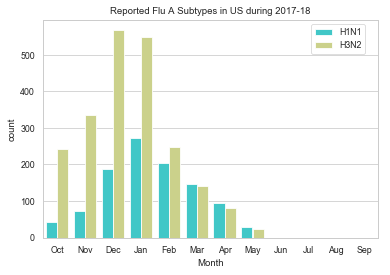

In [18]:
# Plots the records by month, starting with the beginning of the flu season in Oct 2017

order = ['Oct', 'Nov', 'Dec','Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep']

sns.countplot(x='Month', data=df_fluA_Human, hue='Subtype', order = order, palette='rainbow').set_title('Reported Flu A Subtypes in US during 2017-18')

# relocate the legend
plt.legend(bbox_to_anchor = (0.8, 0.98), loc =2, borderaxespad=0.)


plt.savefig('FluA.png')

### Partial answer to Question 2: For Flu A, the only reported subtypes are H1N1 and H3N2 with H3N2 being reported at higher rates. There is a peak of cases in Dec 2017 for H3N2 and Jan 2018 for H1N1.

Unlike the 2 subtypes, there are many more strains reported:


In [19]:
df_fluA_Human["Strain Name"].nunique()

3230

Because there are so many strains, a figure won't work, but we can list them to get an idea the most common submissions. This may prove useful later when we need to look at exact sequences.

A little primer on [how to read strain names](https://www.cdc.gov/flu/about/viruses/types.htm):

Antigenic type/host origin/geographical origin/strain #/isolation year (if fluA, hemagglutinin and neuraminidase description, e.g., H1N1)

In [20]:
df_H1N1_strains = df_fluA_Human[df_fluA_Human["Subtype"] == "H1N1"]
H1N1_strains = df_H1N1_strains['Strain Name'].value_counts().head(10)
df_H3N2_strains = df_fluA_Human[df_fluA_Human["Subtype"] == "H3N2"]
H3N2_strains = df_H3N2_strains['Strain Name'].value_counts().head(10)

print("\033[1m" + "Most Common Strains per Subtype" + "\033[0m")
print("H1N1 strains:\n{}\n".format(H1N1_strains))
print("H3N2 strains:\n{}\n".format(H3N2_strains))


Most Common Strains per Subtype
H1N1 strains:
A/North Dakota/10/2018         2
A/Arizona/26/2018              1
A/Arizona/10/2018              1
A/Massachusetts/08/2018        1
A/Texas/74/2018                1
A/New Hampshire/01/2018        1
A/California/BRD80970N/2018    1
A/Mississippi/01/2018          1
A/Michigan/380/2018            1
A/Connecticut/09/2018          1
Name: Strain Name, dtype: int64

H3N2 strains:
A/North Carolina/12/2018          2
A/Montana/07/2018                 2
A/California/08/2018              2
A/New Hampshire/17/2018           2
A/Virginia/19/2018                2
A/District Of Columbia/04/2017    2
A/Alaska/86/2017                  2
A/Virginia/38/2017                2
A/Texas/61/2018                   1
A/California/NHRC_28273/2017      1
Name: Strain Name, dtype: int64



So it looks like strains are being deposited as they are newly sequenced, with no repeating strains. 

Now lets perform the same analysis for Influenza Type B.

In [21]:
df_fluB_Human.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 53 columns):
Strain Name                      1893 non-null object
Complete Genome                  1893 non-null object
Subtype                          1893 non-null object
Collection Date                  1893 non-null object
Host                             1893 non-null object
Country                          1893 non-null object
State/Province                   1893 non-null object
Geographic Grouping              1893 non-null object
Flu Season                       1893 non-null object
Submission Date                  1893 non-null object
Passage History                  1893 non-null object
Specimen Source Health Status    1893 non-null object
1 PB1                            1893 non-null object
2 PB2                            1893 non-null object
3 PA                             1893 non-null object
4 HA                             1893 non-null object
5 NP                         

In [22]:
n_records = len(df_fluB_Human)
top5_states = df_fluB_Human['State/Province'].value_counts().head(5)
bottom5_states = df_fluB_Human['State/Province'].value_counts().tail(5)
n_uni_subtypes = df_fluB_Human['Subtype'].nunique()
uni_subtypes = df_fluB_Human['Subtype'].unique()

print("\033[1m" + "General Info" + "\033[0m")
print("Total number of flu B records: {}".format(n_records))
print("Top 5 states reporting Flu B:\n{}\n".format(top5_states))
print("Bottom 5 states reporting Flu B:\n{}\n".format(bottom5_states))
print("\033[1m" + "Subtype Details" + "\033[0m")
print("Number of unique subtypes reported: {}".format(n_uni_subtypes))
print("Those subtypes are: {}".format(uni_subtypes))

General Info
Total number of flu B records: 1893
Top 5 states reporting Flu B:
-N/A-         375
California    209
Florida        57
Arizona        45
Texas          44
Name: State/Province, dtype: int64

Bottom 5 states reporting Flu B:
Arkansas        10
Tennessee       10
Rhode Island     6
Nevada           4
Unknown          1
Name: State/Province, dtype: int64

Subtype Details
Number of unique subtypes reported: 1
Those subtypes are: ['-N/A-']


Interesting that the highest record type did not fill in the state field. Also there is only one subtype reported, which is unnamed. We can still take a look at the montly reporting dates and most common strains.

To simplify the graphs later on, will relabel these as just "FluB_Sub_ukwn"

In [23]:
df_fluB_Human = df_fluB_Human.replace(to_replace="-N/A-", value="FluB_Sub_unkwn")

Also want to take a look at the strains for fluB.

In [24]:
fluB_strains = df_fluB_Human["Strain Name"].value_counts().head(10)

print("\033[1m" + "Most Common Strains for Flu B" + "\033[0m")
print("FluB_Sub_unkwn:\n{}\n".format(fluB_strains))

Most Common Strains for Flu B
FluB_Sub_unkwn:
B/California/32/2018                1
B/Ontario/074/2018                  1
B/North Carolina/6726/2018          1
B/Missouri/11/2017                  1
B/Michigan/93/2017                  1
B/California/NHRC_BRD12595N/2018    1
B/Alberta/318/2017                  1
B/Maryland/14/2018                  1
B/Massachusetts/19/2017             1
B/Oklahoma/6729/2018                1
Name: Strain Name, dtype: int64



Also no repeat strains for fluB. Will continue to convert the DataFrame of fluB so it includes the month collection date.

In [25]:
df_fluB_Human = df_fluB_Human.copy()  
df_fluB_Human['Collection Date'] = pd.to_datetime(df_fluB_Human['Collection Date'])

In [26]:
# check the conversion
type(df_fluB_Human['Collection Date'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [27]:
# Create a new column for just the month of each record. This will be the x-axis of my graph

df_fluB_Human['Month'] = df_fluB_Human['Collection Date'].apply(lambda time: time.month)

In [28]:
# The month is an int conver to --> month as str
import calendar

df_fluB_Human['Month'] = df_fluB_Human['Month'].apply(lambda x: calendar.month_abbr[x])

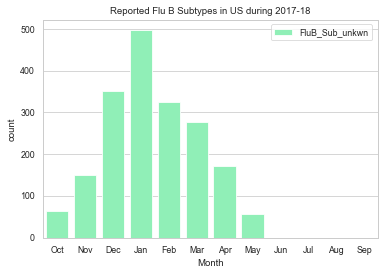

In [29]:
#Plots the records by month, starting with the beginning of the flu season in Oct 2017

order = ['Oct', 'Nov', 'Dec','Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep']

sns.countplot(x='Month', data=df_fluB_Human, hue='Subtype', order = order, palette='rainbow').set_title('Reported Flu B Subtypes in US during 2017-18')

# relocate the legend
plt.legend(bbox_to_anchor = (0.68, 0.98), loc =2, borderaxespad=0.)

plt.savefig('FluB.png')

Here's a look at just Flu B for the season, with a peak around January with about 500 submissions. 

Let's see how it compares to Flu A, by combining this all into one figure.

In [30]:
df_AllFlu = pd.merge(df_fluA_Human, df_fluB_Human, how='outer')

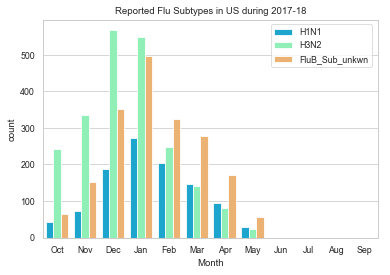

In [31]:
#Plotting out all three subtypes
order = ['Oct', 'Nov', 'Dec','Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep']

sns.countplot(x='Month', data=df_AllFlu, hue='Subtype', order = order, palette='rainbow').set_title('Reported Flu Subtypes in US during 2017-18')

# relocate the legend
plt.legend(bbox_to_anchor = (0.68, 0.98), loc =2, borderaxespad=0.)

plt.savefig('Flu_allsubtypes.png')

### Here is a cumulative look at all three subtypes: Flu A H1N1, Flu A H3N2, and Flu B 'N/A'. What's interesting is how Flu B persists during the end while Flu A is slowly waning out for the season.


In [50]:
# Let's take a look if we can do a plot by age or gender

df_fluA_Human.columns

Index(['Strain Name', 'Complete Genome', 'Subtype', 'Collection Date', 'Host',
       'Country', 'State/Province', 'Geographic Grouping', 'Flu Season',
       'Submission Date', 'Passage History', 'Specimen Source Health Status',
       '1 PB2', '2 PB1', '3 PA', '4 HA', '5 NP', '6 NA', '7 MP', '8 NS', 'Age',
       'Gender', 'M2 31N', 'M2 26F', 'M2 27A', 'M2 30T', 'M2 34E',
       'NA 275Y N1', 'NA 292K N2', 'NA 119V N2', 'NA 294S N2', 'PB1-F2 66S',
       'PB2 E627K', 'PB2 D701N', 'PB2 A199S', 'PB2 A661T', 'PB2 V667I',
       'PB2 K702R', 'PA S409N', 'NP L136M', 'M2 A16G', 'M2 C55F', 'NS1 T92E',
       'RERRRKKR', 'Sensitive Drug', 'Resistant Drug', 'Submission Date.1',
       'NCBI Taxon ID', 'pH1N1-like', 'US Swine H1 Clade',
       'Global Swine H1 Clade test', 'H5 Clade', 'Unnamed: 52', 'Month'],
      dtype='object')

In [79]:
fluA_age = df_fluA_Human['Age'].value_counts().head(10)
fluB_age = df_fluB_Human['Age'].value_counts().head(10)

print(fluA_age)
print('\n')
print(fluB_age)

-N/A-    2381
1          23
20         19
2          18
7          18
4          18
5          18
33         17
13         17
6          16
Name: Age, dtype: int64


FluB_Sub_unkwn    1562
9                   12
6                   12
11                  10
53                   9
5                    9
19                   9
4                    9
55                   9
20                   8
Name: Age, dtype: int64


Looks like the majority of the data has unreported fields for age, so let's check on gender.

In [78]:
fluA_gender = df_fluA_Human['Gender'].value_counts().head(5)
fluB_gender = df_fluB_Human['Gender'].value_counts().head(5)

print(fluA_gender)
print('\n')
print(fluB_gender)


-N/A-    2380
F         439
M         420
Name: Gender, dtype: int64


FluB_Sub_unkwn    1562
M                  177
F                  154
Name: Gender, dtype: int64


Likewise for gender. So although there was insufficient data from this database for those columns, we can still explore the distribution of cases by state, which we will demonstrate in the next notebook.